In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

## Task 1
Use NumPy function to draw random samples from a normal (Gaussian) distribution.
- Create a set of 2000 samples using NumPy function. This data set should be distributed as a Gaussian with mean=0 and standard deviation (std)=0.2
- For the created data set verify the mean and the variance
- Display/plot the histogram of the samples, along with the probability density function using matplotlib.pyplot and np functions

In [2]:
mean = 0.
std = 0.2
samples = np.random.normal(loc=mean, scale=std, size=2000)
mean_calc = np.mean(samples)
std_calc = np.std(samples)
print ("Mean calculated: ", mean_calc, "\nStandard Deviation calculated: ", std_calc)

assert(np.allclose([mean_calc],[mean],atol=0.01))
assert(np.allclose([std_calc],[std_calc],atol=0.01))

Mean calculated:  0.0033089228555960907 
Standard Deviation calculated:  0.19973242090857446


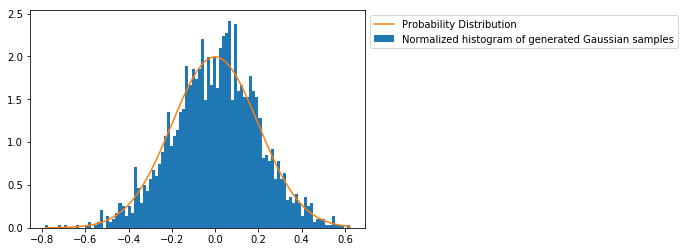

In [3]:
# Histogram of Samples
plt.hist(samples, bins=2000//20, normed= True,label='Normalized histogram of generated Gaussian samples')
plt.plot(np.linspace(min(samples),max(samples),2000),
        plt.mlab.normpdf(np.linspace(min(samples),max(samples),2000),mean, std),
        label="Probability Distribution")
plt.legend(bbox_to_anchor = (1,1))

plt.show()

## Task 2
Two-dimensional kernel density estimate: comparing scikit-learn and scipy

In [4]:
class KDE(object):
    def __init__(self):
        self.sample1, self.sample2 = None, None
        self.xy = None
        self.xmin, self.xmax = None, None
        self.ymin, self.ymax = None, None
        self.X, self.Y = None, None
        self.positions = None
        self._generate_data()
    
    def plot_all (self, Z_scipy=None, Z_scikit=None):
        if not(Z_scikit.all and Z_scipy.all):
            print ("Error. This function can only be used for plotting\
            both Scipy and Scikit KDE together")

        else:
            #2D plot scipy
            fig = plt.figure(figsize=(14,10))
            ax = plt.subplot(221)
            plt.imshow(np.rot90(Z_scipy), cmap=plt.cm.coolwarm,
                      extent=[self.xmin, self.xmax, self.ymin, self.ymax])
            plt.scatter(self.sample1, self.sample2, c='k',s=5, edgecolor='')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title("2D plot of KDE using scipy")

            #3D plot scipy
            ax2 = fig.add_subplot(222, projection='3d')
            ax2.plot(self.sample1, self.sample2, 'k.', markersize=2)
            ax2.plot_surface(self.X, self.Y, Z_scipy, cmap=plt.cm.coolwarm,
                                   linewidth=0, antialiased=False)
            ax2.set_xlabel('X')
            ax2.set_ylabel('Y')
            ax2.set_zlabel('Z')
            plt.title("3D plot of KDE using scipy")
            plt.tight_layout()


            #2D plot Scikitlearn
            ax = plt.subplot(223)
            plt.imshow(np.rot90(Z_scikit), cmap=plt.cm.coolwarm,
                      extent=[self.xmin, self.xmax, self.ymin, self.ymax])
            plt.scatter(self.sample1, self.sample2, c='k',s=5, edgecolor='')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title("2D plot of KDE using Scikitlearn")
            
            #3D plot Scikitlearn
            ax2 = fig.add_subplot(224, projection='3d')
            ax2.plot(self.sample1, self.sample2, 'k.', markersize=2)
            ax2.plot_surface(self.X, self.Y, Z_scikit, cmap=plt.cm.coolwarm,
                                   linewidth=0, antialiased=False)
            ax2.set_xlabel('X')
            ax2.set_ylabel('Y')
            ax2.set_zlabel('Z')
            plt.title("3D plot of KDE using Scikitlearn")
            plt.tight_layout()
            plt.show()
    
    def _generate_data (self):
        #source: 
        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
        
        data1 = np.random.normal(size=500)
        data2 = np.random.normal(scale=0.5 ,size=500)
        self.sample1, self.sample2 = (data1 + data2),(data1-data2)
        self.xmin = self.sample1.min()
        self.xmax = self.sample1.max()
        self.ymin = self.sample2.min()
        self.ymax = self.sample2.max()
        self.X, self.Y = np.mgrid[self.xmin:self.xmax:100j,
                                  self.ymin:self.ymax:100j]
        self.positions = np.vstack([self.X.ravel(), self.Y.ravel()])
        self.xy = np.vstack([self.sample1, self.sample2])
    
    def findKDE(self, library="scipy"):
        if library == "scipy":
            kernel = stats.gaussian_kde(self.xy)
            Z = np.reshape(kernel(self.positions).T, self.X.shape)
            print ("Calculating KDE using ", library,"... ")
        
        elif library == "scikit":
            #source:
            #https://gist.github.com/daleroberts/7a13afed55f3e2388865b0ec94cd80d2
            
            d = self.xy.shape[0]
            n = self.xy.shape[1]
            bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
            #bw = 0.2
            kde = KernelDensity(bandwidth=bw, metric='euclidean',
                                kernel='gaussian', algorithm='ball_tree')
            kde.fit(self.xy.T)
            Z = np.reshape(np.exp(kde.score_samples(self.positions.T)), self.X.shape)
            print ("Calculating KDE using ", library,"... ")
        return Z

Calculating KDE using  scipy ... 
Calculating KDE using  scikit ... 
PLotting...


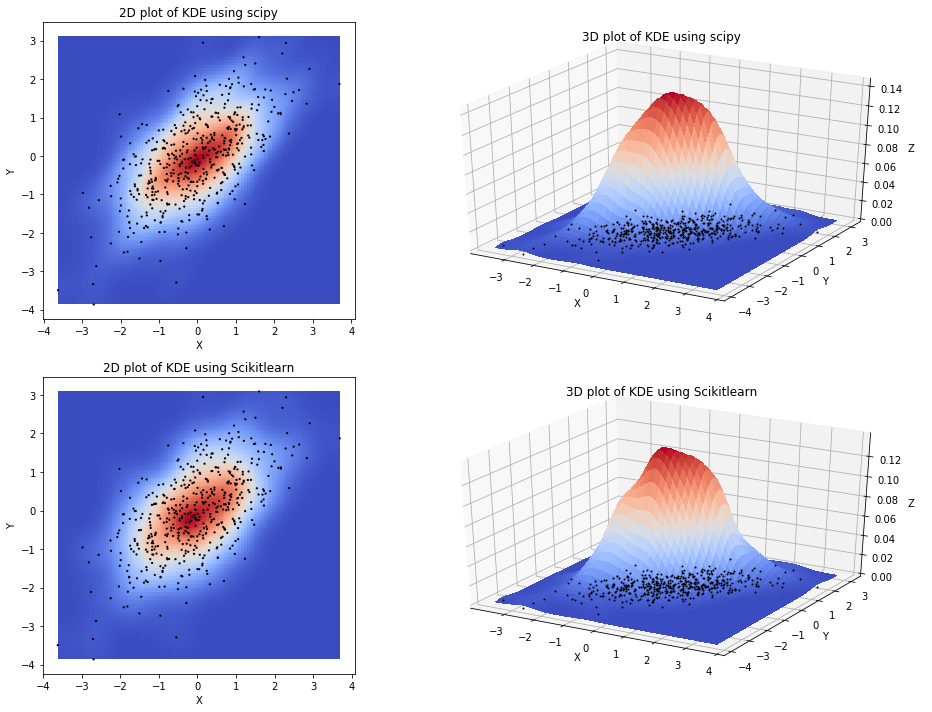

In [5]:
compareKDE = KDE()
Z_scipy = compareKDE.findKDE(library="scipy")
Z_scikit = compareKDE.findKDE(library="scikit")
print("PLotting...")
compareKDE.plot_all(Z_scikit=Z_scikit,Z_scipy=Z_scipy)